In [11]:
import math
import numpy as np
import matplotlib.pyplot as plt
N = 100 # number of points per class
d0 = 2 # dimension
C = 3
X = np.zeros((d0, N*C)) # data Matrix
y = np.zeros(N*C, dtype= 'uint8') # class label

for j in range(C):
    ix = range(N*j, N*(j+1))
    r = np.linspace(0.0, 1, N) # radius
    t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.2 # theta
    X[:, ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
    y[ix] = j



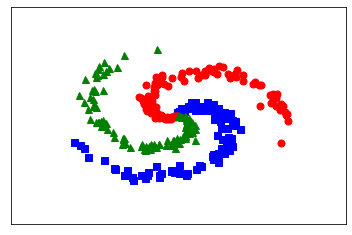

In [12]:
#data visualize

plt.plot(X[0, :N], X[1,: N], 'bs', markersize = 7)
plt.plot(X[0,N: 2*N], X[1, N:N*2], 'ro', markersize = 7)
plt.plot(X[0, 2*N:3*N], X[1, 2*N:3*N], 'g^', markersize = 7)

plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.show()

In [13]:
def softmax(V):
    e_V = np.exp(V - np.max(V, axis = 0, keepdims = True))
    Z = e_V / e_V.sum(axis = 0)
    return Z
#one hot coding
from scipy import sparse
def convert_labels(y, C= 3):
    Y = sparse.coo_matrix((np.ones_like(y), (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y
#cost or loss function
def cost(Y, Yhat):
    return -np.sum(Y*np.log(Yhat))/Y.shape[1]

<\h1> Main Program


In [19]:
d0 = 2
d1 = h = 100 # size of hiden layer
d2 = C = 3
#initialize parameter randomly

W1 = 0.01*np.random.randn(d0, d1)
b1 = np.zeros((d1, 1))
W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))

Y = convert_labels(y, C)
N = X.shape[1]
eta = 1 # learning rate
for i in range(10000):
    ## Feedforward
    Z1 = np.dot(W1.T, X) + b1
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    Yhat = softmax(Z2)
    
    if i%1000 == 0:
        #compute the loss
        loss = cost(Y, Yhat)
        print("iter %d, loss: %f"%(i, loss))
        
    # backpropagation
    E2 = (Yhat - Y)/N
    dW2 = np.dot(A1, E2.T)
    db2 = np.sum(E2, axis = 1, keepdims = True)
    E1 = np.dot(W2, E2)
    E1 = np.dot(W2, E2)
    E1[Z1 <= 0] = 0 #gradient of ReLU
    dW1 = np.dot(X, E1.T)
    db1 = np.sum(E1, axis = 1, keepdims = True)
    
    #gradient descent update
    W1 += -eta*dW1
    b1 += -eta*db1
    W2 += -eta*dW2
    b2 += -eta*db2

iter 0, loss: 1.098586
iter 1000, loss: 0.117842
iter 2000, loss: 0.053313
iter 3000, loss: 0.035902
iter 4000, loss: 0.028798
iter 5000, loss: 0.024717
iter 6000, loss: 0.022318
iter 7000, loss: 0.020798
iter 8000, loss: 0.019671
iter 9000, loss: 0.018807


In [20]:
Z1 = np.dot(W1.T, X) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
predicted_class = np.argmax(Z2, axis=0)
print('training accuracy: %.2f %%' % (100*np.mean(predicted_class == y)))

training accuracy: 99.33 %


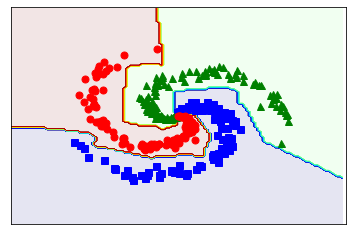

In [39]:
# visualize results

xm = np.arange(-1.5, 1.5, 0.025)
xlen = len(xm)
ym = np.arange(-1.5, 1.5, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)

xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)
X0 = np.vstack((xx1, yy1))

Z1 = np.dot(W1.T, X0) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
Z = np.argmax(Z2, axis = 0)

Z = Z.reshape(xx.shape)
CS = plt.contourf(xx, yy, Z, 200, cmap = 'jet', alpha = .1)

N = 100

plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7)
plt.plot(X[0, N:2*N], X[1, N:2*N], 'g^', markersize = 7)
plt.plot(X[0, 2*N:], X[1, 2*N:], 'ro', markersize = 7)

plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xticks(())
plt.yticks(())
# plt.axis('equal')
# display(X[1:, :], original_label)
#fn = 'ex_res'+ str(d1) + '.png'
# plt.savefig(fn, bbox_inches='tight', dpi = 600)
plt.show()